 # <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/X.Example_Files/Images/Lightbulb.png?raw=true" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%">    Signal Conversion - ADC</span> </div>

## <span style="color:#00a0e4;"> Keywords: </span>

```ADC```, ```Signal conversion```

# I. Introduction
<br>
<div class="title"style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

## <div style="color:#00a0e4"> 1. Background </div>

It's common knowledge that since the Digital Revolution, the digital world has grown to become crucial to the functioning of society. It allowed the shift from **analog** technologies to **digital** eletronics, therefore the creation of computers, mobile phones amongst other vastly used technologies. 

Analog signals are **continuous** signals which represent physical measurements such as human voice in air. These signals are difficult to process and store since they are composed of an infinite amount of values. Digitals signals, on the other hand, are **discrete** signals much more easy to store and process since they can be encoded in binary, for example.

In fact, the **Analog-to-Digital conversion (ADC)** and **Digital-to-Analog conversion (DAC)** have opened the path to the development of the technological world as we know it today, since most devices possess an ADC to transform analog to digital signals, which are then used as the input, and afterwards a DAC's to reverse that process and give the output. As a consequence, the amount of information which is possible to store in a digital device has been growing.

## <div style="color:#00a0e4"> 2. Objectives</div>
* Learn the most relevant steps of the ADC.
* Understand the importance of sampling and storing information on a device.
* Get acquainted with the transfer functions.

# II. Experimental
<br>
<div style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

This section will be focused on the principal mechanisms that constitute the ADC.

## <div style="color:#00a0e4">  1. Analog-to-Digital Conversion </div>

### <div style="color:#00a0e4">  Sampling</div>

**Sampling** is the first step through which the continuous signal is reduced into a series of discrete values. These are not values at random, but rather taken at a specific rate which is previously decided. The graphics 1 and 2 below show the difference between these two types of signals.

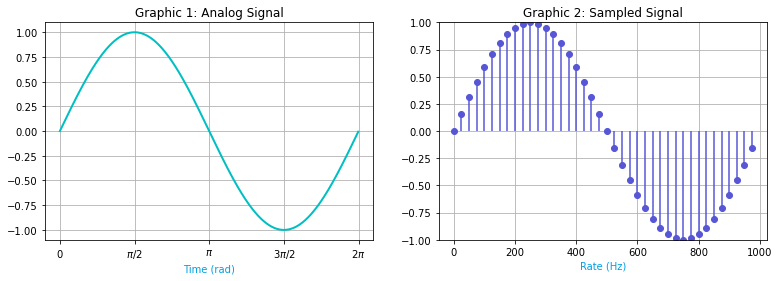

In [2]:
import numpy as np
from matplotlib import pyplot as plt
fs=1000.
tmax=1000
tmin=0
sp=25


t=np.arange(0,fs/fs,1/fs)
y=np.sin(2*np.pi*t)

n=np.sin(2*np.pi*t)
idx=np.arange(tmin,tmax,sp)

plt.figure(figsize=(20, 4))
plt.subplot(132)
plt.vlines(idx, 0, n[idx],'r',color="#5756d6")
plt.plot(idx, n[idx],'ro',linewidth=2., color="#5756d6")
plt.title('Graphic 2: Sampled Signal')
plt.ylim([-1., 1.])
plt.xlabel('Rate (Hz)',color="#00a0e4")
plt.grid()

plt.subplot(131)
plt.grid()
plt.plot(t, y,'r',linewidth=2.,color="#00bfc2" )
plt.title('Graphic 1: Analog Signal')
plt.xlabel('Time (rad)', color="#00a0e4")
plt.xticks((0, .25, .5, .75, 1.), ('$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'))

plt.show()

As mentioned, one of the variables needed to be taken into consideration is the **sampling rate**. But what are the possible outcomes of choosing one at random ? Let's analyse some examples.

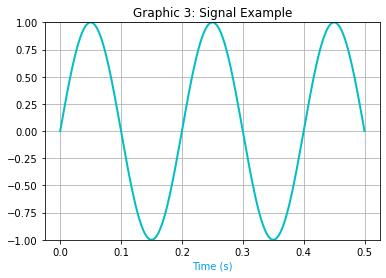

In [3]:
n=np.sin(2*5*np.pi*t)
tmax=501
tmin=0

plt.figure()
idx=np.arange(tmin, tmax)
plt.plot(t[idx], n[idx],'r',linewidth=2., color="#00bfc2")
plt.ylim([-1., 1.])
plt.title('Graphic 3: Signal Example')
plt.xlabel('Time (s)',color="#00a0e4")
plt.grid()
plt.show()

Graphic 3 shows a simple sine wave signal at rate 5Hz. Considering sampling rates of 10Hz, 20Hz and 100Hz we obtain the following graphics.

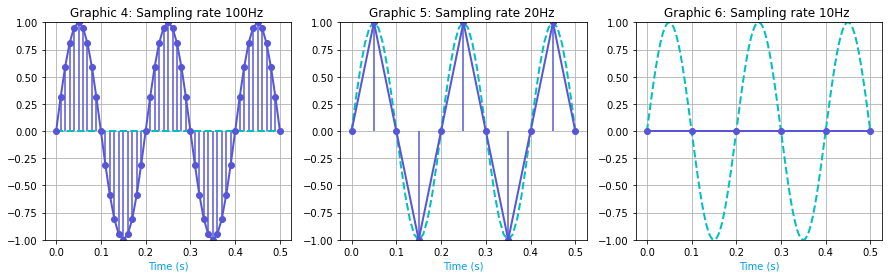

In [4]:
n=np.sin(2*5*np.pi*t)
tmax=502
tmin=0
sr1 = 10
sr2 = 50
sr3 = 100
idx=np.arange(tmin, tmax)

plt.figure(figsize=(15, 4))
plt.subplot(133)
plt.plot(t[idx], n[idx],'k--',linewidth=2.,color="#00bfc2")
idx=np.arange(tmin, tmax, sr3)
plt.plot(t[idx], n[idx],'k',linewidth=2.,color="#5756d6")
plt.vlines(t[idx], 0, n[idx],'r')
plt.plot(t[idx], n[idx],'ro',linewidth=2., color="#5756d6")
plt.title('Graphic 6: Sampling rate 10Hz ')
plt.ylim([-1., 1.])
plt.xlabel('Time (s)',color="#00a0e4")
plt.grid()

plt.subplot(131)
plt.plot(t[idx], n[idx],'k--',linewidth=2.,color="#00bfc2")
idx=np.arange(tmin, tmax, sr1)
plt.plot(t[idx], n[idx],'k',linewidth=2.,color="#5756d6")
plt.vlines(t[idx], 0, n[idx],'r',color="#5756d6")
plt.plot(t[idx], n[idx],'ro',linewidth=2., color="#5756d6")
plt.title('Graphic 4: Sampling rate 100Hz ')
plt.ylim([-1., 1.])
plt.xlabel('Time (s)',color="#00a0e4")
plt.grid()

plt.subplot(132)
plt.plot(t[idx], n[idx],'k--',linewidth=2.,color="#00bfc2")
idx=np.arange(tmin, tmax, sr2)
plt.plot(t[idx], n[idx],'k',linewidth=2.,color="#5756d6")
plt.vlines(t[idx], 0, n[idx],'r',color="#5756d6")
plt.plot(t[idx], n[idx],'ro',linewidth=2., color="#5756d6")
plt.title('Graphic 5: Sampling rate 20Hz ')
plt.ylim([-1., 1.])
plt.xlabel('Time (s)',color="#00a0e4")
plt.grid()

plt.show()

As visible, a sampling rate of 100Hz is undoubtedly representative of the given signal. However, one can conclude that it contains redundant information, since graphic 5 demonstrates that a 20Hz sampling frequency is just enough to fully reconstruct the original signal, as long as it's used an appropriate interpolation.
As for graphic 6, a sampling rate of 10Hz is clearly unsuitable in this case, since its interpolation generates a constant signal equal to zero.

Furthermore, it's important to note that when sampling the **aliasing** phenomenon can occur. Essencially what happens is, when considering certain sampling rates, different signals can become indistinguishable.

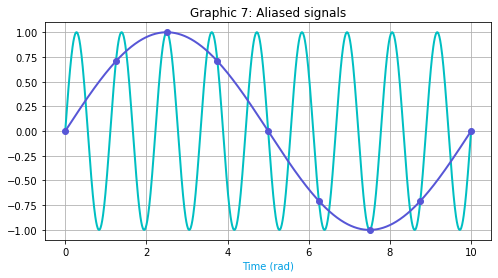

In [7]:
plt.figure(figsize=(8,4))

tmin=0
tmax=10
nsamples=9
fs=1000

x = np.linspace(tmin,tmax,fs)
x1 = np.linspace(tmin,tmax, nsamples)

y1 = np.sin(2*np.pi * 0.9 * x)
plt.plot( x, y1, "-", linewidth=2., color="#00bfc2")

y2 = np.sin(2*np.pi * 0.1 * x)
plt.plot(x, y2, "-",linewidth=2., color="#5756d6")
plt.grid()

y3 = np.sin(2*np.pi * 0.1 * x1)
plt.plot( x1, y3, "o", linewidth=2., color="#5756d6" )

plt.title('Graphic 7: Aliased signals')
plt.xlabel('Time (rad)', color="#00a0e4")

plt.show()

As evident in the graphic above, two possible interpolations can be made given this set of samples. 

Having considered this, the next relevant question to be asked should be whether if there's a rule in order to determine a suitable rate for a specific signal and the answer is: yes, the **Nyquist Theorem**!

### <div style="color:#00a0e4">   Nyquist Theorem </div>

The Nyquist theorem states that the highest frequency which can be represented accurately is one half of the sampling rate. In other words, the sampling frequency has to at least be 2 times the highest signal frequency in order to guarantee that the samples  are in fact representative of the whole signal.


$F_{sample} > 2 \times F_{max}$

Now going back to graphics 4-6 we reach some important conclusions. 
* Graphic 4 is clearly **undersampled**, reporting false information about the analog data.
* Graphic 5 is the lowest frequency which allows an accurate reproduction of the signal - **Nyquist frequency**.
* Graphic 6 is **oversampling**, which creates large digital files mostly with unnecessary information.

### <div style="color:#00a0e4">   Quantization </div>

After sampling, the discrete signal remains with a great number of possible amplitude values. In order to reduce the continuous amplitude domain, the signal is quantized. This process consists of:

    1. Defining a certain number of quantization levels;
    2. Assign to each sampled value its closest level.

This way we only have a finite and controled number of amplitude values, therefore decreasing its variety without changing considerably the signal itself. This can be observed in graphic 8.

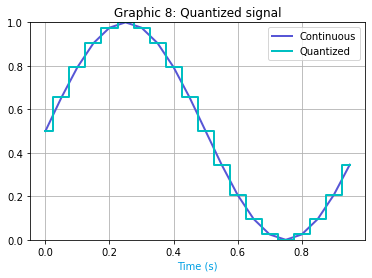

In [8]:
n=(np.sin(2*np.pi*t)+1)/2.
tmin=0
tmax=1000 
sp=50

plt.figure()
idx=np.arange(tmin,tmax,sp)
plt.plot(t[idx], n[idx],'k',linewidth=2., color="#5756d6")
plt.plot(t[idx], n[idx],'r',linewidth=2., color="#00bfc2", drawstyle='steps-mid')
plt.ylim([0., 1.])
plt.xlabel('Time (s)', color="#00a0e4")
plt.grid()

plt.title('Graphic 8: Quantized signal' )
plt.legend(['Continuous', 'Quantized'])
plt.show()

By now, it's important to know how can the ADC's **resolution** influence this process.
Resolution is defined by the number of existent bits. Were the system to have n bits, the resolution would be given by:

$Resolution = \dfrac{Full \ scale \ range}{2^n}$

As can be predicted, this system can and does introduce errors, namely the **quantization error**. This error is determined by the difference between the analog signal and the closest available digital value at each sampling instant. Basically, it decides what's the  smallest signal variation that the ADC is capable of detecting.

The **ideal quantization interval** depends on our use case and physical constraints. However it's important to note that due to the finite nature of the computer's and other digital device's memory, the intervals between levels cannot in most cases avoid quantization.

### <div style="color:#00a0e4">  Biosignal Example</div>

The sine wave example has been used up untill now since it's simplicity allows an easy visualization of the effects of sampling and quantization. However it may also be interesting to analyse possible distortions **biosignals** can undergo depending on the chosen sampling rate and resolution.

Graphics 9-11 show real-life electrocardiogram (ECG) data sampled in different rates for the duration of 2 periods.

In [10]:
def samples(signal,i):
    signal1 = []
    j=0
    while j< len(i):
        signal1 += [signal[i[j]]]
        j+=1
    return signal1

def select(lst, *indices):
    return list(lst[i] for i in indices)

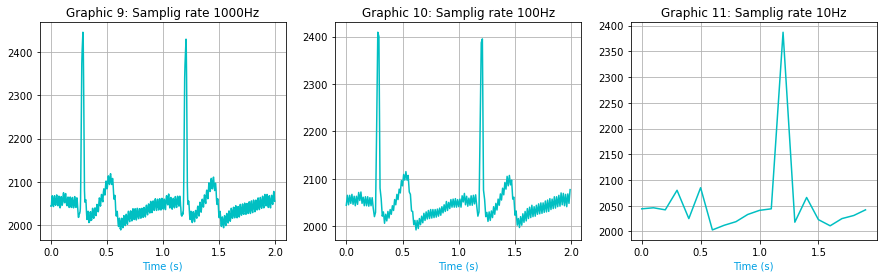

In [11]:
import os
import numpy as np
import pylab as pl

fname = os.path.join(r'..\X.Example_Files\ECG.txt')
signal = np.loadtxt(fname)

mdata={'sampling_rate': 1000, 'Resolution': 12, 'Labels': 'ECG'}

Fs = mdata['sampling_rate']
T = 2       #duration

i1 = list(np.arange(0,2000,10)) 
i2 = list(np.arange(0,2000,100))

rate1000 = signal[:2000]
rate100 = samples(rate1000,i1)
rate10 = samples(rate1000,i2)

pl.figure(figsize=(15, 4))
pl.subplot(131)
N = len(rate1000) # number of samples
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
pl.plot(ts, rate1000, color="#00bfc2")
pl.title('Graphic 9: Samplig rate 1000Hz' )
pl.xlabel('Time (s)', color="#00a0e4")
pl.grid()

pl.subplot(132)
N = len(rate100) # number of samples
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
pl.plot(ts, rate100, color="#00bfc2")
pl.title('Graphic 10: Samplig rate 100Hz' )
pl.xlabel('Time (s)', color="#00a0e4")
pl.grid()

pl.subplot(133)
N = len(rate10) # number of samples
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
pl.plot(ts, rate10, color="#00bfc2")
pl.title('Graphic 11: Samplig rate 10Hz' )
pl.xlabel('Time (s)', color="#00a0e4")
pl.grid()

pl.show()


As visible, a sampling frequency of **1000Hz** is enough to clearly identify the signal's QRS complex as well as its T wave. The same applies to a sampling rate of **100Hz**, eventhough it's noticible that it contains less information than the first one. Hence, both are a satisfactory representation of the given ECG data.

When analysing the last graphic, corresponding to a sampling rate of **10Hz**, it can be seen that one of the two R peaks disappeared. Moreover the identification of the other waves which characterize this type of signal is nearly impossible. One can only conclude that this frequency leads to the loss of crucial information.

As for **resolution**, different number of bits can change drastically the resolution of the signal. The graphics below demonstrate exactly that.

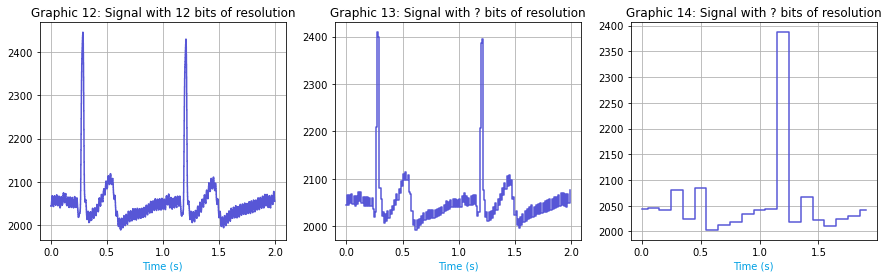

In [12]:
pl.figure(figsize=(15, 4))
pl.subplot(131)
N = len(rate1000) # number of samples
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
pl.plot(ts, rate1000, color="#5756d6", drawstyle='steps-mid')
pl.title('Graphic 12: Signal with 12 bits of resolution' )
pl.xlabel('Time (s)', color="#00a0e4")
pl.grid()

pl.subplot(132)
N = len(rate100) # number of samples
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
pl.plot(ts, rate100, color="#5756d6", drawstyle='steps-mid')
pl.title('Graphic 13: Signal with ? bits of resolution' )
pl.xlabel('Time (s)', color="#00a0e4")
pl.grid()

pl.subplot(133)
N = len(rate10) # number of samples
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
pl.plot(ts, rate10, color="#5756d6", drawstyle='steps-mid')
pl.title('Graphic 14: Signal with ? bits of resolution' )
pl.xlabel('Time (s)', color="#00a0e4")
pl.grid()

pl.show()

### <div style="color:#00a0e4">  Binary encoding</div>

The final step in the ADC is binary encoding. Since the y values are quantized, digital devices don't need to store the actual values, but rather a much smaller numbers composed of 0's and 1's.

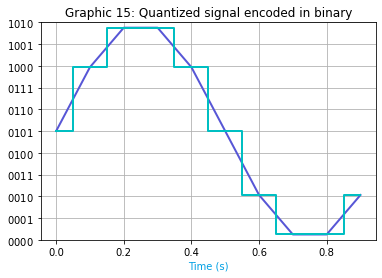

In [13]:
n=(np.sin(2*np.pi*t)+1)/2.
tmin = 0
tmax = 1000
sp =100

plt.figure()
idx=np.arange(tmin,tmax,sp)
plt.plot(t[idx], n[idx],'k',linewidth=2., color="#5756d6")
plt.plot(t[idx], n[idx],'r',linewidth=2., color="#00bfc2", drawstyle='steps-mid')
plt.ylim([0., 1.])
plt.xlabel('Time (s)', color="#00a0e4")
plt.grid()

plt.title('Graphic 15: Quantized signal encoded in binary')
plt.yticks((0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.), ('$0000$', '$0001$', '$0010$', '$0011$', '$0100$', '$0101$', '$0110$', '$0111$', '$1000$', '$1001$', '$1010$'))
plt.show()

The signal above would then be encoded in the sequence: *0101  1000  1010  1000  0101  0010  0000  0010*


<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    Learn more about binary encoding in https://www.sciencedirect.com/topics/engineering/binary-encoding
</div>

### <div style="color:#00a0e4">  Transfer functions</div>

As has been shown before, the process of storing information in a certain device requires some type of **encoding** in order to optimize its storing capacity. To do this, the device changes the signal/information parameters into simpler ones which can be recognized by the device itself when its time to give an output. However, a user can too decode the device's stored units into real world units, simply using the **transfer function**.
Usually, the transfer function is given in the device's documentation. For instance, BITalino's documentation provides the transfer functions needed to decode some biosignals' data. 

They are the following (in alphabetical order):

**Accelerometer (ACC)** [-3 g : 3 g]

ACCg = 2 * ((ACCB - Cm) / (CM - Cm)) - 1

Where:
ACCg – ACC value in g-force (g)
ACCB – ACC value obtained from BITalino
Cm – Calibration Value (Minimum)
CM – Calibration Value (Maximum)

**Assembled Electrodermal Activity (EDA)** [1 µS : ∞ µS]

RMOhm = 1 - EDAB / 2^n
EDAµS = 1 / RMOhm

Where:
EDAµS – EDA value in micro Siemens (µS)
EDAB – EDA value obtained from BITalino
RMOhm - Sensor resistance in megaOhms(MOhm)
n – number of bits (bit)

**Electrocardiography (ECG)** [-1.5 mV : 1.5 mV]

ECGV = (ECGB * Vcc / 2^n - Vcc / 2) / GECG
ECGmV = ECGV * 1000

Where:
ECGV – ECG value in Volts (V)
ECGmV - ECG value in miliVolts (mV)
ECGB – ECG value obtained from BITalino
Vcc – Operating Voltage (V)
n – number of bits (bit)
GECG – ECG Sensor Gain

**Electromyography (EMG)** [-1.65 mV : 1.65 mV]

EMGV = (EMGB * Vcc / 2^n - Vcc / 2) / GEMG
EMGmV = EMGV * 1000

Where:
EMGV – EMG value in Volts (V)
EMGmV - EMG value in miliVolts (mV)
EMGB – EMG value obtained from BITalino
Vcc – Operating Voltage (V)
n – number of bits (bit)
GEMG – EMG Sensor Gain

**Light (LUX)** [0 % : 100 %]

LUX% = 100 * (LUXB / 2^n)

Where:
LUX% – LUX value in percentage (%)
LUXB – LUX value obtained from BITalino
n – number of bits (bit)


<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    To find all the BITalino transfer functions, visit http://forum.bitalino.com/viewtopic.php?t=128#p224 .
</div>

<div style="height:100px; background:white;border-radius:10px;text-align:center"> 

<a> <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/X.Example_Files/Images/IT.png?raw=true" alt="it" style=" bottom: 0; width:250px;
    display: inline;
    left: 250px;
    position: absolute;"/> </a>
<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/X.Example_Files/Images/ist.png?raw=true"
         alt="alternate text" 
         style="position: relative;   width:250px; float: left;
    position: absolute;
    display: inline;
    bottom: 0;
    right: 100;"/>
</div> 

<div style="width: 100%; ">
<div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> <a href="https://forms.gle/C8TdLQUAS9r8BNJM8">here</a>.</span></span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Ana Isabel Encarnação```
